In [1]:
import pandas as pd
import explanations 
import glob, os    

import matplotlib

# Zapnout zobrazování grafů (procento uvozuje „magickou” zkratku IPythonu):
%matplotlib inline

# Příprava dat

In [2]:
# nacteme data ze souboru a pridame kraj
data = {}
for f in explanations.file_names:
    data[f] = pd.read_csv('data/2018/{}'.format(f), encoding='iso-8859-2', delimiter=';', names=explanations.main_columns)
    data[f]['kde'] = explanations.file_names[f]
whole = pd.concat(data, ignore_index=True)

c:\schule\mi-pyt\__venv__\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\schule\mi-pyt\__venv__\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
c:\schule\mi-pyt\__venv__\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (56,57) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# prejmenujeme hodnoty na spravne dle explanations.py
for i in whole:
    if explanations.decode_key.get(i):
        whole[i] = whole[i].apply(lambda x: explanations.decode_key[i].get(x))
        

In [4]:
pd.set_option('display.max_rows', 500)
whole.isnull().all()

identifikacni_cislo                          False
druh_pozemni_komunikace                      False
cislo_pozemni_komunikace                     False
den_mesic_rok                                False
weekday(p2a)                                 False
cas                                          False
druh_nehody                                  False
druh_srazky_jedoucich_vozidel                False
druh_pevne_prekazky                          False
charakter_nehody                             False
zavineni_nehody                              False
alkohol_u_vinika_nehody_pritomen             False
hlavni_priciny_nehody                        False
usmrceno_osob                                False
tezce_zraneno_osob                           False
lehce_zraneno_osob                           False
celkova_hmotna_skoda                         False
druh_povrchu_vozovky                         False
stav_povrchu_vozovky_v_dobe_nehody           False
stav_komunikace                

In [5]:
# smazeme prazdne sloupce
whole.dropna(how='all', axis=1, inplace=True)

In [6]:
# nacteme chodce
chodci = pd.read_csv('data/2018/CHODCI.csv', delimiter=';', encoding='iso-8859-2', names=explanations.ped_columns)

for i in chodci:
    if explanations.decode_key.get(i):
        chodci[i] = chodci[i].apply(lambda x: explanations.decode_key[i].get(x))

In [7]:
chodci.head()

,identifikacni_cislo,kategorie_chodce,stav_chodce,chovani_chodce,situace_v_miste_nehody
0,2100180003,žena,pod vlivem alkoholu; obsah alkoholu v krvi 1 ?...,"náhlé vstoupení do vozovky; z chodníku, krajnice",jiná situace
1,2100180007,žena,dobrý; žádné nepříznivé okolnosti nebyly zjištěny,"správné, přiměřené",přecházení; po vyznačeném přechodu
2,2100180039,muž,pod vlivem alkoholu; obsah alkoholu v krvi 1 ?...,"náhlé vstoupení do vozovky; z chodníku, krajnice",jiná situace
3,2100180047,muž,"nepozornost, roztržitost","náhlé vstoupení do vozovky; z chodníku, krajnice",jiná situace
4,2100180051,žena,dobrý; žádné nepříznivé okolnosti nebyly zjištěny,"správné, přiměřené",přecházení; po vyznačeném přechodu


In [8]:
# mergeneme s nehodami
whole = whole.merge(chodci, on='identifikacni_cislo', how='outer')

In [9]:
whole.set_index('identifikacni_cislo', inplace=True)
whole

,druh_pozemni_komunikace,cislo_pozemni_komunikace,den_mesic_rok,weekday(p2a),cas,druh_nehody,druh_srazky_jedoucich_vozidel,druh_pevne_prekazky,charakter_nehody,zavineni_nehody,...,q,r,s,t,lokalita_nehody,kde,kategorie_chodce,stav_chodce,chovani_chodce,situace_v_miste_nehody
identifikacni_cislo,,,,,,,,,,,,,,,,,,,,,
2100180001,komunikace místní,NaN,2018-01-01,1,2356,srážka; s jedoucím nekolejovým vozidlem,zezadu,nepříchází v úvahu; nejedná se o srážku s pevn...,nehoda; pouze s hmotnou škodou,řidičem; motorového vozidla,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
2100180002,komunikace sledovaná; (ve vybraných městech),NaN,2018-01-01,1,50,srážka; s pevnou překážkou,nepřichází v úvahu; nejedná se o srážku jedouc...,"sloup; telefonní, veřejného osvětlení, elektri...",nehoda; pouze s hmotnou škodou,řidičem; motorového vozidla,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
2100180003,"komunikace účelová; ostatní (parkoviště, odpoč...",NaN,2018-01-01,1,40,srážka; s chodcem,nepřichází v úvahu; nejedná se o srážku jedouc...,nepříchází v úvahu; nejedná se o srážku s pevn...,nehoda; s následky na životě,chodcem,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,žena,pod vlivem alkoholu; obsah alkoholu v krvi 1 ?...,"náhlé vstoupení do vozovky; z chodníku, krajnice",jiná situace
2100180004,komunikace sledovaná; (ve vybraných městech),NaN,2018-01-01,1,114,srážka; s jedoucím nekolejovým vozidlem,zezadu,nepříchází v úvahu; nejedná se o srážku s pevn...,nehoda; pouze s hmotnou škodou,řidičem; motorového vozidla,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
2100180005,komunikace místní,NaN,2018-01-01,1,232,srážka; s pevnou překážkou,nepřichází v úvahu; nejedná se o srážku jedouc...,svodidlo,nehoda; s následky na životě,řidičem; motorového vozidla,...,NaN,NaN,NaN,NaN,v obci; vyplňí se i položka p5b,nehody na území hl. m. Prahy,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190906180826,komunikace místní,NaN,2018-12-28,5,2560,"srážka; s vozidlem zaparkovaným, odstaveným",nepřichází v úvahu; nejedná se o srážku jedouc...,nepříchází v úvahu; nejedná se o srážku s pevn...,nehoda; pouze s hmotnou škodou,řidičem; motorového vozidla,...,Pomalý,560570.0,552844.0,GN_V0.1UIR-ADR_410,v obci; vyplňí se i položka p5b,nehody na území Karlovarského kraje,NaN,NaN,NaN,NaN
190906180827,silnice 2. třídy,222.0,2018-12-30,0,2045,srážka; s chodcem,nepřichází v úvahu; nejedná se o srážku jedouc...,nepříchází v úvahu; nejedná se o srážku s pevn...,nehoda; s následky na životě,chodcem,...,Pomalý,560383.0,550451.0,GN_V0.1UIR-ADR_410,v obci; vyplňí se i položka p5b,nehody na území Karlovarského kraje,muž,nezjištěno,"náhlé vstoupení do vozovky; z chodníku, krajnice",přecházení; mimo přechod (20 a více metrů od p...
190906180828,silnice 2. třídy,210.0,2018-12-30,0,2200,srážka; s pevnou překážkou,nepřichází v úvahu; nejedná se o srážku jedouc...,svodidlo,nehoda; pouze s hmotnou škodou,řidičem; motorového vozidla,...,Pomalý,560286.0,NaN,GN_V0.1UIR-ADR_410,mimo obec,nehody na území Karlovarského kraje,NaN,NaN,NaN,NaN


In [10]:
whole.to_csv('clean-2018.csv')

# Otázky a úkoly

#### Kolik nehod v roce 2018 PČR zaznamenala?


In [11]:
len(whole)

104765

#### Kolik procent zaznamenaných nehod bylo smrtelných?


In [12]:
usmrceni = whole[ whole['usmrceno_osob'] == 0 ].index
 
str(len(whole.drop(usmrceni)) / len(whole) * 100) + '%'

'0.4858492817257672%'

#### Kolik lidí zemřelo při srážce s odrazníkem, patníkem, sloupkem dopravní značky apod.?


In [13]:
odraznik = whole[ whole['druh_pevne_prekazky'] != 'odrazník, patník,; sloupek směrový, sloupek dopravní značky apod.' ].index

whole.drop(odraznik)['usmrceno_osob'].sum()

4

#### Kolik procent zaznamenaných nehod, které se staly na kolejích tramvaje, bylo smrtelných?


In [14]:
tramvaj = whole[ whole['situovani_nehody_na_komunikaci'] != 'na kolejích tramvaje' ].index

tramvaj_usmrceni = whole.drop(tramvaj)[ whole.drop(tramvaj)['usmrceno_osob'] == 0 ].index

str(len(whole.drop(tramvaj).drop(tramvaj_usmrceni)) / len(whole.drop(tramvaj)) * 100) + '%'

'0.8771929824561403%'

#### Vyberte časté výrobní značky vozidel (např. Škoda, BMW): ty které se účastnily alespoň padesáti nehod. Vykreslete graf, který pro každou častou výrobní značku ukáže procento nehod v zatáčce (vzhledem k celkovému počtu nehod vozidel této značky).

In [15]:
x = whole.groupby('vyrobni_znacka_motoroveho_vozidla').count()

aspon_pade = x[ x['druh_pozemni_komunikace'] > 49 ].index

In [16]:
auta = {}
zatacka = {}
data = []

for auto in aspon_pade:
    auta[auto] = whole[ whole['vyrobni_znacka_motoroveho_vozidla'] == auto]
    
    zatacka[auto] = auta[auto][ auta[auto]['smerove_pomery'] == 'zatáčka']
    
    data.append({'key': auto, 'value': len(zatacka[auto]) /len(auta[auto]) * 100})

df = pd.DataFrame(data)

df.sort_values('value', ascending=False, inplace=True)
df.set_index(['key'], inplace=True)

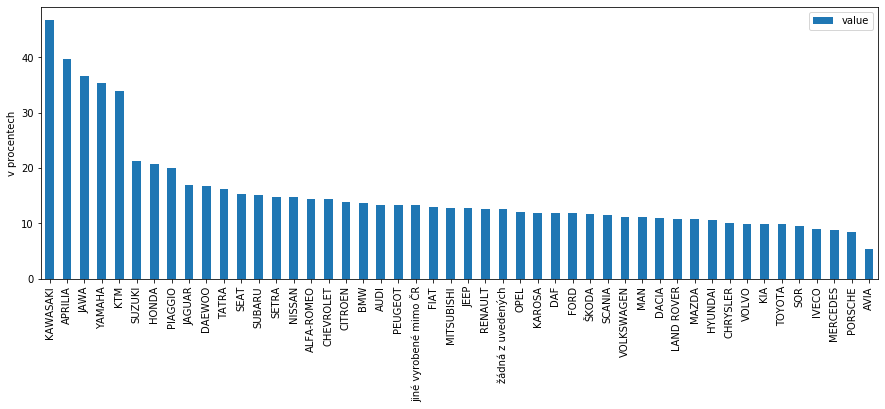

In [17]:
ax = df.plot.bar(figsize=(15,5))

ax.set_ylabel('v procentech')
ax.set_xlabel('')
ax